##### Importing libraries and framework

In [7]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Prepare the data

In [9]:
# Load the data from the CSV file into a DataFrame
data = pd.read_csv('datasets/listings_preprocessed.csv')

# Separate the input features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Filter out non-numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns of the training and testing sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill missing values in the training set with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)

# Fill missing values in the test set with the mean of the corresponding columns in the training set
X_test.fillna(X_train.mean(), inplace=True)

# Fill remaining NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


#### Predict the data

In [13]:
# Create an SVR model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the model
svr.fit(X_train, y_train)

# Predict using the trained model
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

#### Display R-square

In [12]:
# Calculate R-squared scores for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the R-squared scores
print("R-squared score for training set: {:.3f}".format(r2_train))
print("R-squared score for testing set: {:.3f}".format(r2_test))

R-squared score for training set: -0.033
R-squared score for testing set: -0.001


#### Plot the regression model

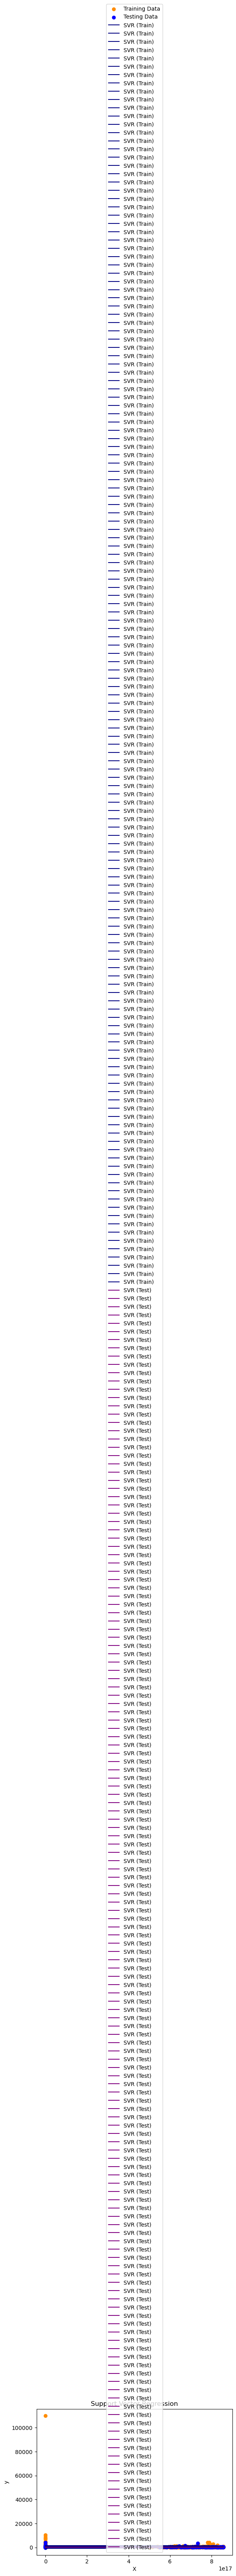

In [14]:
# Plot the results
plt.scatter(X_train["id"], y_train, color='darkorange', label='Training Data')
plt.scatter(X_test["id"], y_test, color='blue', label='Testing Data')
plt.plot(X_train, y_pred_train, color='navy', label='SVR (Train)')
plt.plot(X_test, y_pred_test, color='purple', label='SVR (Test)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()